# Machine Learning Engineering Task

In [117]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
%matplotlib inline
from pandas import Series, datetime
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
from xgboost import XGBClassifier

Reading the CSV File

In [118]:
df_file = "/home/dylen/Downloads/mle_task/train.csv"
df = pd.read_csv(df_file, parse_dates=[0])

In [119]:
df.head()

,Timestamp,FeaA,FeaB,FeaC,FeaD,FeaE,Label
0,2014-02-09 12:44:39,1.639634,1.042247,3.188435,3.360856,133.06,4
1,2014-02-09 12:46:39,1.639924,1.044448,3.187664,3.364210,135.02,4
2,2014-02-09 12:48:39,1.639827,1.042247,3.188050,3.367553,135.36,4
3,2014-02-09 12:50:39,1.640258,1.035558,3.187664,3.370495,136.22,4
4,2014-02-09 12:52:39,1.639566,1.059480,3.188821,3.373136,136.48,4


Checking Datatypes of each data

In [122]:
print(df.shape)
print(df.dtypes)

(800000, 13)
Timestamp    datetime64[ns]
FeaA                float64
FeaB                float64
FeaC                float64
FeaD                float64
FeaE                float64
Label                 int64
date                  int64
month                 int64
year                  int64
hour                  int64
minute                int64
second                int64
dtype: object


Plotting the Time Series Data

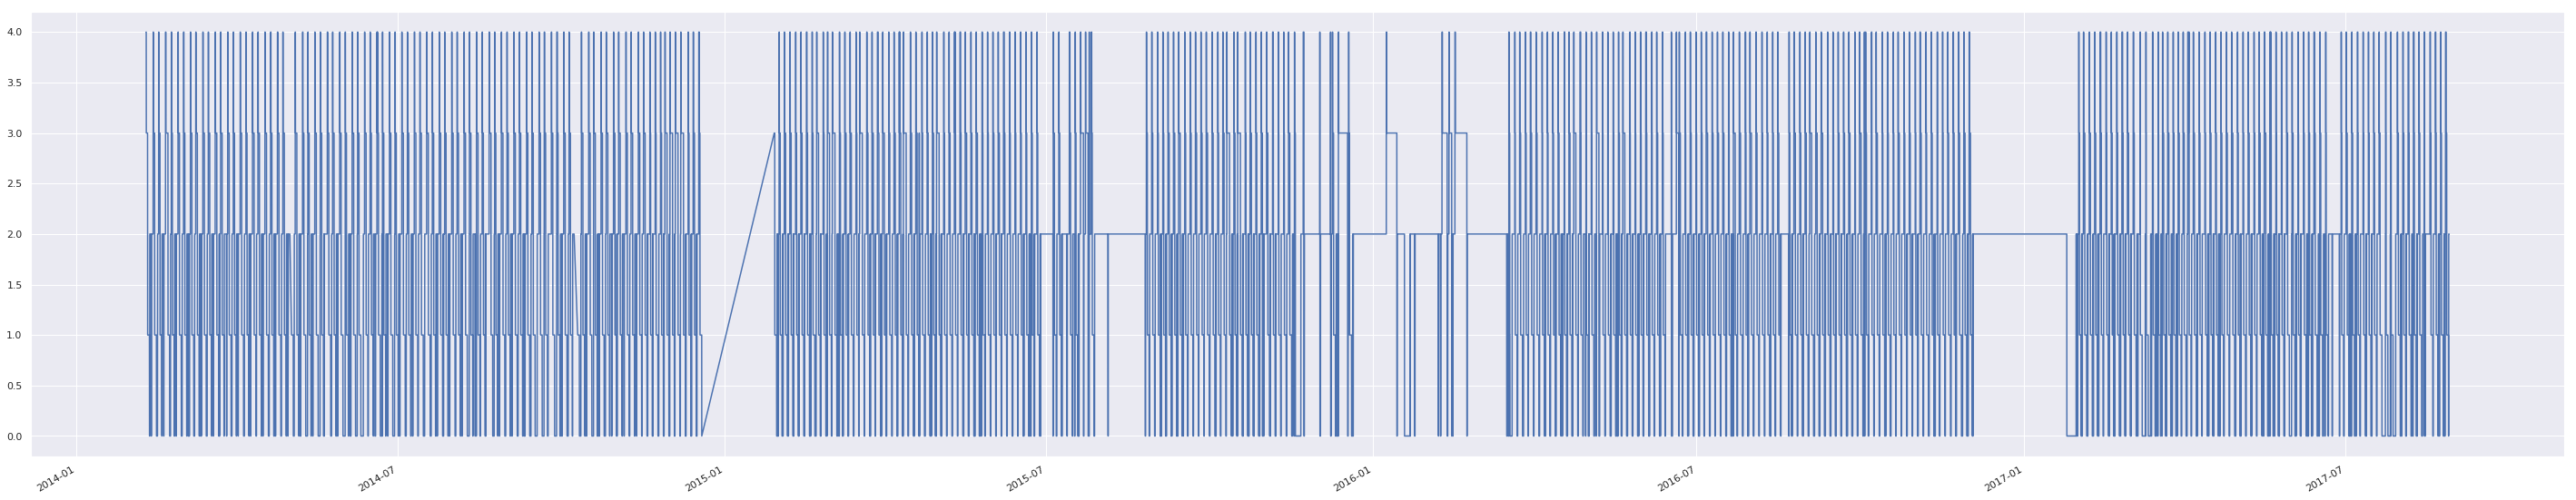

In [132]:
x = df['Timestamp']
y = df['Label']

# plot
plt.plot(x,y)
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.show()

Converting timestamp to separate fields in dataframe

In [133]:
df['date'] = [d.day for d in df['Timestamp']]
df['month'] = [d.month for d in df['Timestamp']]
df['year'] = [d.year for d in df['Timestamp']]
df['hour'] = [d.hour for d in df['Timestamp']]
df['minute'] = [d.minute for d in df['Timestamp']]
df['second'] = [d.second for d in df['Timestamp']]

In [134]:
df.head()

,Timestamp,FeaA,FeaB,FeaC,FeaD,FeaE,Label,date,month,year,hour,minute,second
0,2014-02-09 12:44:39,1.639634,1.042247,3.188435,3.360856,133.06,4,9,2,2014,12,44,39
1,2014-02-09 12:46:39,1.639924,1.044448,3.187664,3.364210,135.02,4,9,2,2014,12,46,39
2,2014-02-09 12:48:39,1.639827,1.042247,3.188050,3.367553,135.36,4,9,2,2014,12,48,39
3,2014-02-09 12:50:39,1.640258,1.035558,3.187664,3.370495,136.22,4,9,2,2014,12,50,39
4,2014-02-09 12:52:39,1.639566,1.059480,3.188821,3.373136,136.48,4,9,2,2014,12,52,39


In [135]:
del df['Timestamp']

In [136]:
df.head()

,FeaA,FeaB,FeaC,FeaD,FeaE,Label,date,month,year,hour,minute,second
0,1.639634,1.042247,3.188435,3.360856,133.06,4,9,2,2014,12,44,39
1,1.639924,1.044448,3.187664,3.364210,135.02,4,9,2,2014,12,46,39
2,1.639827,1.042247,3.188050,3.367553,135.36,4,9,2,2014,12,48,39
3,1.640258,1.035558,3.187664,3.370495,136.22,4,9,2,2014,12,50,39
4,1.639566,1.059480,3.188821,3.373136,136.48,4,9,2,2014,12,52,39


In [137]:
df = df[['year', 'month', 'date', 'hour', 'minute', 'second', 'FeaA', 'FeaB', 'FeaC', 'FeaD', 'FeaE', 'Label']]

In [141]:
X, y = df.iloc[:,:-1],df.iloc[:,-1]

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

Creating the Model and Fitting the model

In [143]:
xgbmodel= XGBClassifier()

In [145]:
xgbmodel.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [146]:
ypred = xgbmodel.predict(X_test)
accu_score = accuracy_score(y_test, ypred)
print('Accuracy Score' + ": " + str(accu_score))

Accuracy Score: 0.9915625


/home/dylen/anaconda/envs/newenv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Predicting on the test data

In [147]:
test_df_file = "/home/dylen/Downloads/mle_task/test.csv"
test_df = pd.read_csv(test_df_file, parse_dates=[0])

In [148]:
print(test_df.shape)
print(test_df.dtypes)

(65499, 6)
Timestamp    datetime64[ns]
FeaA                float64
FeaB                float64
FeaC                float64
FeaD                float64
FeaE                float64
dtype: object


In [149]:
test_df['date'] = [d.day for d in test_df['Timestamp']]
test_df['month'] = [d.month for d in test_df['Timestamp']]
test_df['year'] = [d.year for d in test_df['Timestamp']]
test_df['hour'] = [d.hour for d in test_df['Timestamp']]
test_df['minute'] = [d.minute for d in test_df['Timestamp']]
test_df['second'] = [d.second for d in test_df['Timestamp']]

In [150]:
test_df = test_df[['year', 'month', 'date', 'hour', 'minute', 'second', 'FeaA', 'FeaB', 'FeaC', 'FeaD', 'FeaE']]

In [151]:
test_df.head()

,year,month,date,hour,minute,second,FeaA,FeaB,FeaC,FeaD,FeaE
0,2017,8,28,11,3,26,1.682911,0.0,1.334861,2.133266,-3.0000
1,2017,8,28,11,5,26,1.683089,NaN,1.337481,2.132880,-2.9800
2,2017,8,28,11,7,26,1.682958,NaN,1.332225,2.133266,-3.0200
3,2017,8,28,11,9,26,1.682848,NaN,1.342675,2.133009,-3.0533
4,2017,8,28,11,11,26,1.682958,NaN,1.332225,2.132751,-3.0867


In [152]:
y_pred = xgbmodel.predict(test_df)
#accu_score = accuracy_score(ytest, y_pred)
#print('Accuracy Score' + ": " + str(accu_score))

/home/dylen/anaconda/envs/newenv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [153]:
data = pd.read_csv(test_df_file, parse_dates=[0])

Plotting on the test data

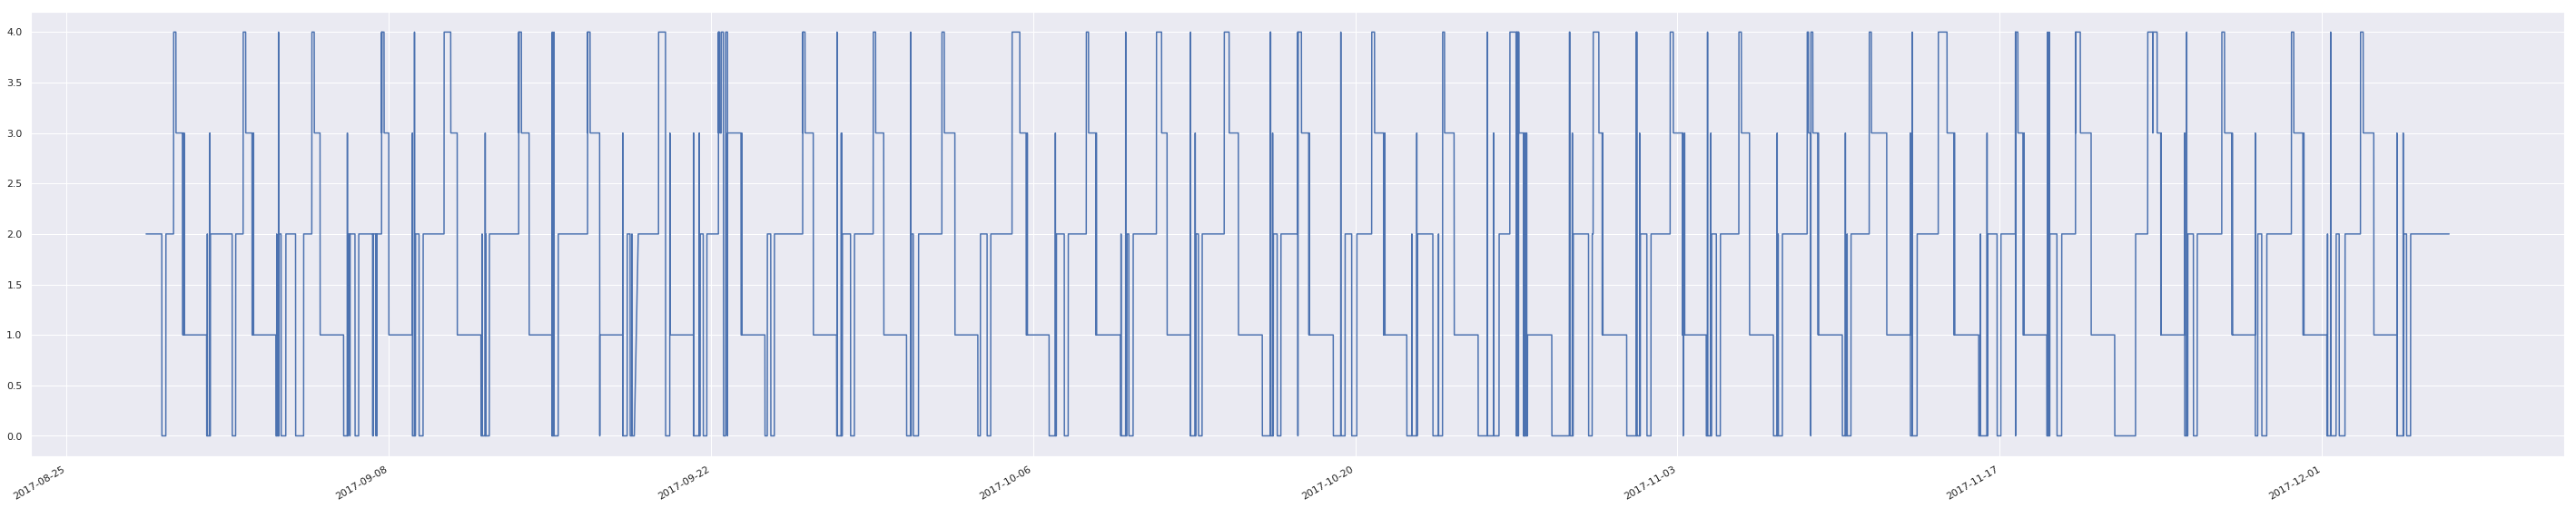

In [154]:
x = data['Timestamp']
y = y_pred

# plot
plt.plot(x,y)
# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()